In [0]:
import os
import sys
import csv
import multiprocessing
from urllib import error
from urllib import request
from PIL import Image
from io import BytesIO
#import io
#import requests
#import pytesseract
from PIL import Image
import pandas as pd
import requests
import re
import base64
from bs4 import BeautifulSoup
import urllib.request as urllib2
!pip3 install opencv-python-headless
import cv2
import numpy as np
from matplotlib.pyplot import imread
from collections import Counter
import matplotlib.pyplot as plt
!pip3 install google-cloud-vision
from google.cloud import vision
from google.cloud.vision import types
import seaborn as sns
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= 'googleapi-txtimg.json'

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/'My Drive'/'Colab Notebooks'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= 'googleapi-txtimg.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


In [0]:
repo_links = pd.read_csv('microservice_based_apps.csv')
images = []
#print(repo_links['source'].dtypes)
for link in repo_links['source']:
    print(link)
    html_page = urllib2.urlopen(link)
    soup = BeautifulSoup(html_page)
    images.append([])
    for img in soup.findAll('img'):
        #print(img)
        images[-1].append(img.get('src'))
        
print(images)



https://github.com/dotnet-architecture/eShopOnContainers
https://github.com/GoogleCloudPlatform/microservices-demo
https://github.com/paulc4/microservices-demo
https://github.com/vietnam-devs/coolstore-microservices
https://github.com/idugalic/micro-ecommerce
https://github.com/johnph/simple-transaction
https://github.com/IBM/spring-boot-microservices-on-kubernetes
https://github.com/vmudigal/microservices-sample
https://github.com/sczyh30/vertx-blueprint-microservice
https://github.com/idugalic/micro-company
https://github.com/venkataravuri/e-commerce-microservices-sample
https://github.com/Azure-Samples/Serverless-microservices-reference-architecture
[['https://github.githubassets.com/images/search-key-slash.svg', '', '', '', 'https://avatars3.githubusercontent.com/u/7357806?s=60&v=4', 'https://github.githubassets.com/images/spinners/octocat-spinner-32.gif', 'https://github.githubassets.com/images/spinners/octocat-spinner-32.gif', 'https://github.githubassets.com/images/spinners/octo

In [0]:
# getting length of list 
length = len(images) 
#print(length)
#print(len(images[0]))
textls=[]
listOfAnno=[]
# Iterating the index 
# same as 'for i in range(len(list))' 
for i in range(length):
    textls.append([])
    print(i)
    for j in range(len(images[i])):
        #img = cv2.imread('images[i]')
        if(images[i][j].split('/')[-1]==''):
            continue
        if(images[i][j].split('/')[0] != 'https:'):
            images[i][j]='https://github.com'+images[i][j]
    
        #file=open([i].split('/')[-1]images,'wb')
        #print(j)
        try:
            file=open(images[i][j].split('/')[-1],'wb')
        except:
            continue 
        file.write(requests.get(images[i][j]).content)
        with open(images[i][j].split('/')[-1], 'rb') as image_file:
            content = image_file.read()
            
        image = types.Image(content=content) 
        client = vision.ImageAnnotatorClient()
        
        #print(client)
        try:
            response = client.text_detection(image=image)
            #print(response)
        except:
            continue
        text = response.text_annotations
        
        #print(type(list(text)))
        if(list(text)== []):
            continue      
        text = list(text[0].description)
        if(text==[]):
            continue
        textls[-1].append(text)    
        annoString =''
        #listOfAnno.append([])
        for ch in text:
            if ch =='_' or '': 
                 annoString+=ch
            elif ch == ' ' :
                 annoString+=' '
            elif ch == '\n':
                listOfAnno.append(annoString)
                annoString= ''
            else:
                annoString+=ch
         

0
1
2
3
4
5
6
7
8
9
10
11


In [0]:
'''
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= 'googleapi-txtimg.json'
with open('eShopOnContainers-architecture.png', 'rb') as image_file1:
    content = image_file1.read()
image1 = types.Image(content=content) 
client = vision.ImageAnnotatorClient()
response = client.text_detection(image=image1)
text = response.text_annotations
text = list(text[0].description)
'''

In [0]:
images[0].split() 

In [0]:
print(text)


In [0]:
images[0].split('/')[0] != 'http:'

In [0]:
print(lelistOfAnno)

In [0]:
listOfAnno

['O Catalog - Microsoft.eSh X',
 'localhost:5100',
 '...',
 'ESHOP',
 'onCONTAINERS',
 'LOGIN',
 'ALL T-SHIRTS',
 'ON SALE',
 'THIS WEEKEND',
 'BRAND',
 'TYPE',
 'All',
 'All',
 'Showing 10 of 12 products - Page 1 - 2',
 'Next',
 'NET',
 'NET',
 '[ ADD TO CART ]',
 '[ ADD TO CART ]',
 '[ ADD TO CART ]',
 '.NET BLACK & WHITE MUG',
 '.NET BLUE SWEATSHIRT',
 '.NET BOT BLACK SWEATSHIRT',
 '$ 8.50',
 '$ 12.00',
 '$ 19.50',
 'eShopOnContainers reference application',
 '(Development environment architecture)',
 'Client apps',
 'Docker Host',
 'Identity microservice (STS+users)',
 'SQL Server',
 'database',
 'eShop mobile app',
 'Xamarin.Forms',
 'Catalog microservice',
 'API Gateways / BFF',
 'C#',
 'SQL Server',
 'xPlat. OS:',
 'iOS',
 'Android',
 'database',
 'RabbitMQ',
 'Ordering microservice',
 'Mobile-Shopping',
 'Windows',
 'SQL Server',
 'database',
 'Ordering.ÄPI',
 'or',
 'Ordering.BackgroundTasks',
 'eShop traditional Web app',
 'Mobile-Marketing',
 'Basket microservice',
 'Azure',

In [0]:
file=open("TextImg.txt",'w')

In [0]:
wordsArray =np.array(listOfAnno)

In [0]:
wordsArray[0]

'O Catalog - Microsoft.eSh X'

In [0]:
file.write(str(listOfAnno))

In [0]:
words=pd.DataFrame(columns=['Key'],data=wordsArray)

In [0]:
wordsCount=pd.DataFrame(columns=['Key'],data=words['Key'].value_counts().index)

In [0]:
wordsCount['count'] = list(words['Key'].value_counts())

In [0]:
#.to_csv('12repoImgtoTxt.csv')
wordsCount['indices'] = list(range(0,len(wordsCount['Key'])))

,Key,count,indices
0,docker,16,0
1,Service,15,1
2,SysAdmin,12,2
3,Buyer,12,3
4,Inventory,8,4
...,...,...,...
852,Service Registration Sequence,1,852
853,Redis cache,1,853
854,Frameworks & Drivers,1,854
855,Asus UX370U i7 8550U (C4217TS)$500,1,855


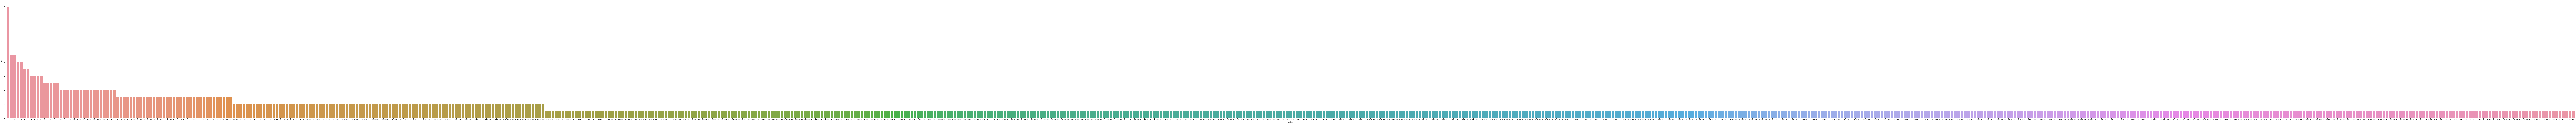

In [0]:
fig,ax=plt.subplots()
fig.set_size_inches(300,14)
sns.barplot(x=wordsCount['indices'],y=wordsCount['count'],ax=ax)
sns.despine()